In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Model Performance On Singular Input

## On Linear Data

In [2]:
input_layer = [1]
hidden_layers = [2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data
feature_data = y_data[:-1].reshape(-1, 1, 1)
target_data = y_data[1:].reshape(-1, 1, 1)

window_size = 1
n_epochs = 100
learning_rate = 10 ** -4

In [3]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate, window_size)
bnn.generate_m()
bnn.generate_v()
bnn.train(n_epochs)

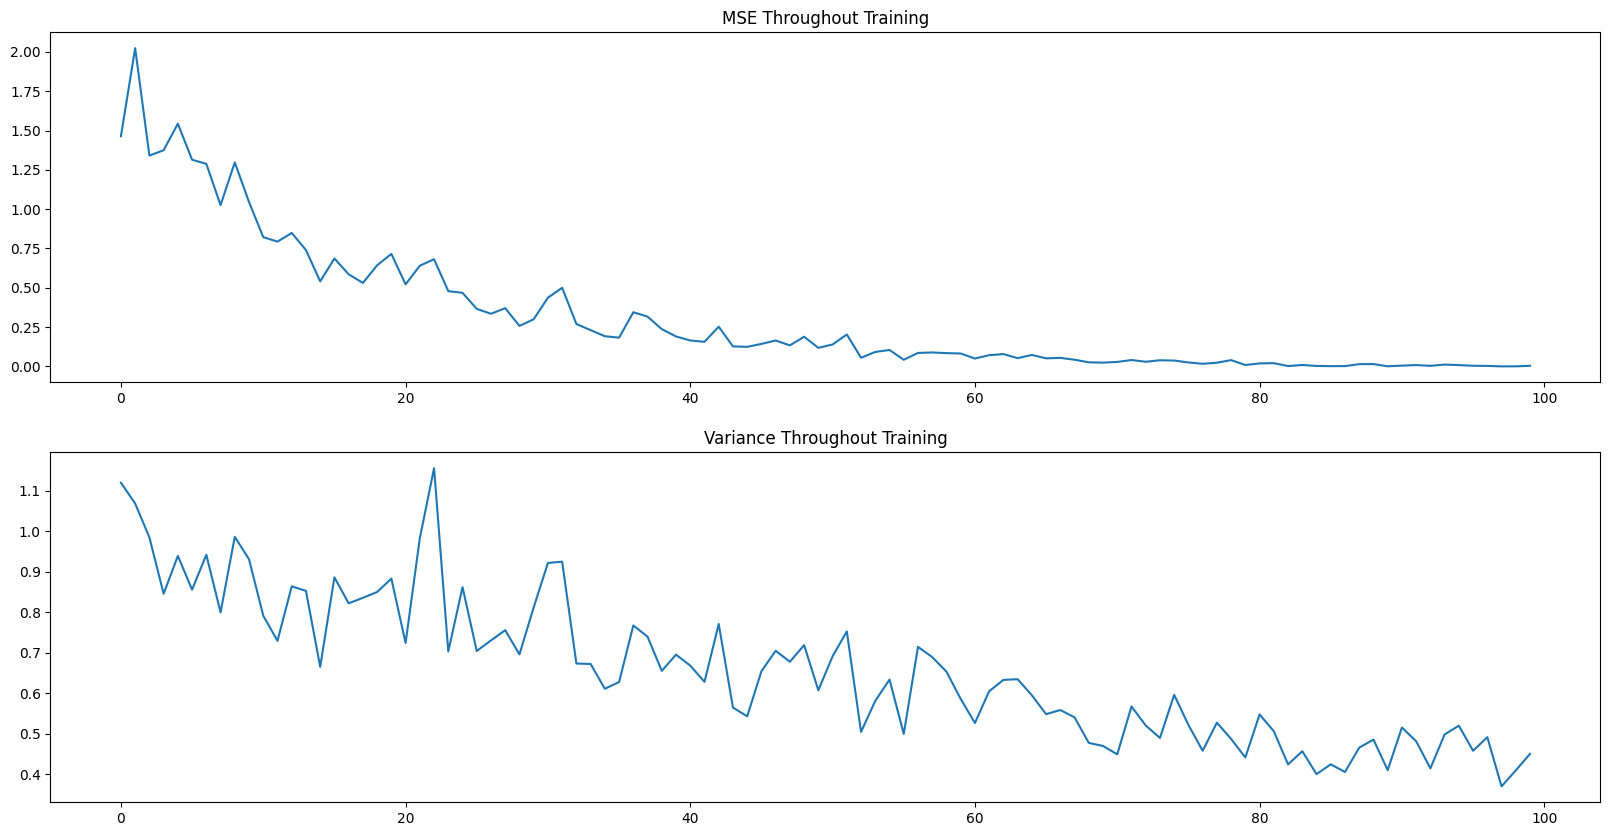

In [4]:
bnn.visualize_performance()

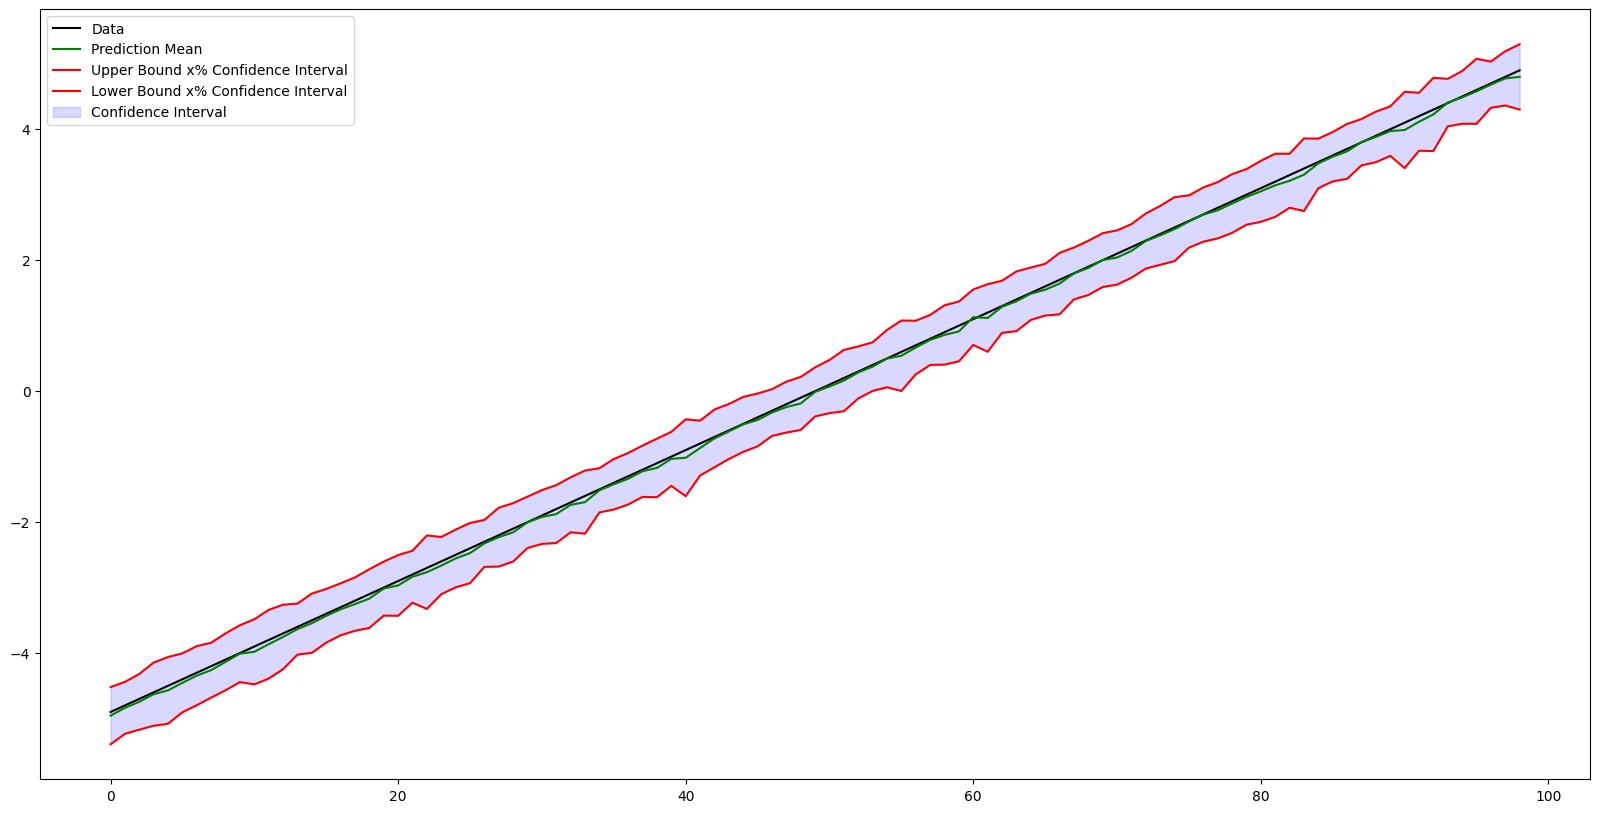

In [5]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

## On Sinusoidal Data

In [6]:
input_layer = [1]
hidden_layers = [4]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data)
feature_data = y_data[:-1].reshape(-1, 1, 1)
target_data = y_data[1:].reshape(-1, 1, 1)

window_size = 1
n_epochs = 50
learning_rate = 10 ** -4

In [7]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate, window_size)
bnn.generate_m()
bnn.generate_v()
bnn.train(n_epochs)

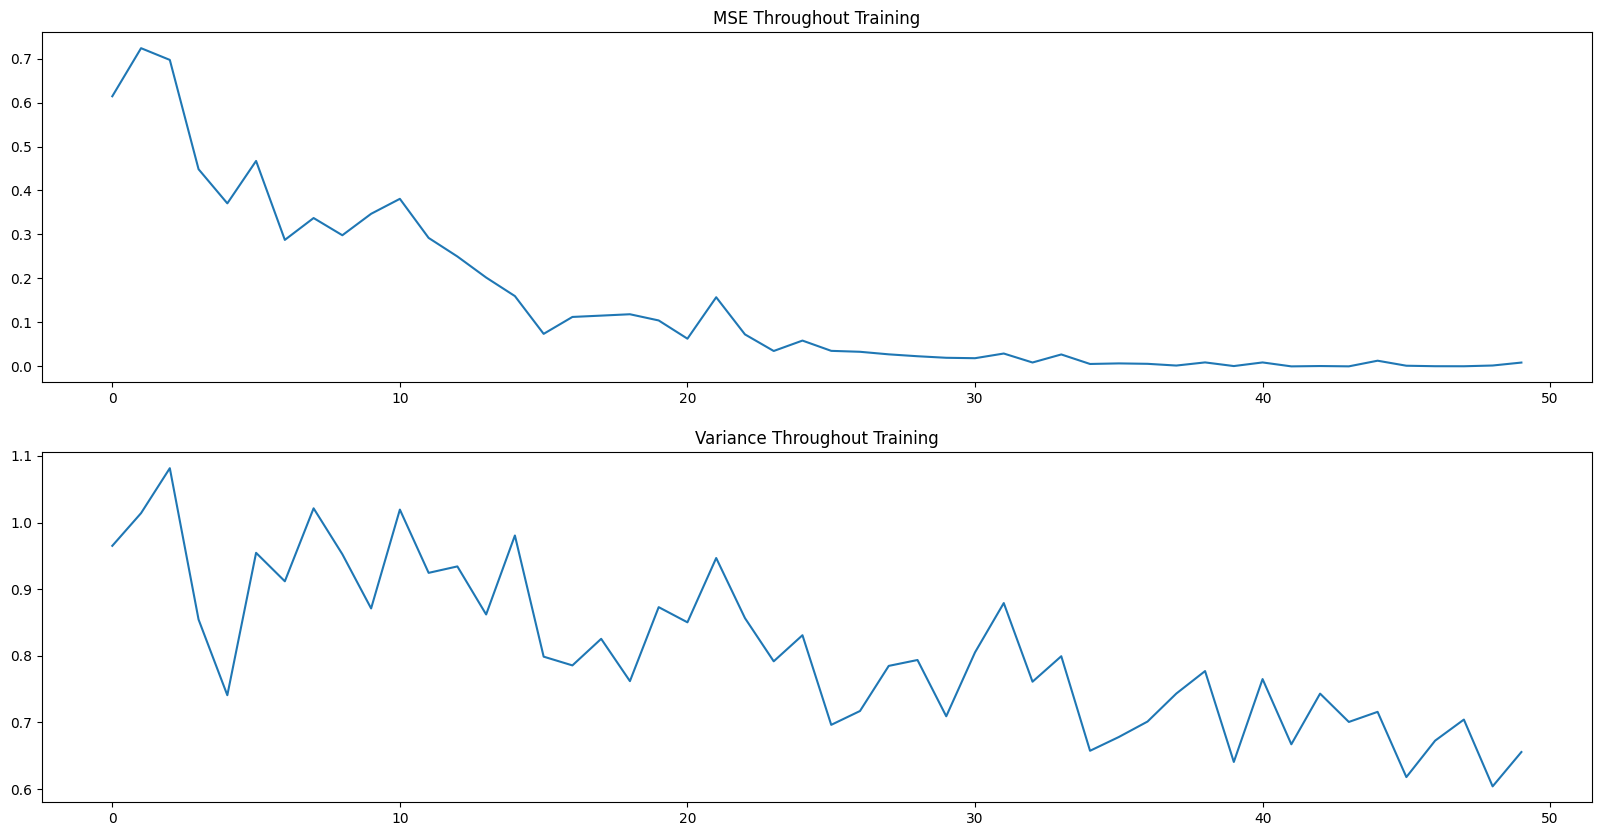

In [8]:
bnn.visualize_performance()

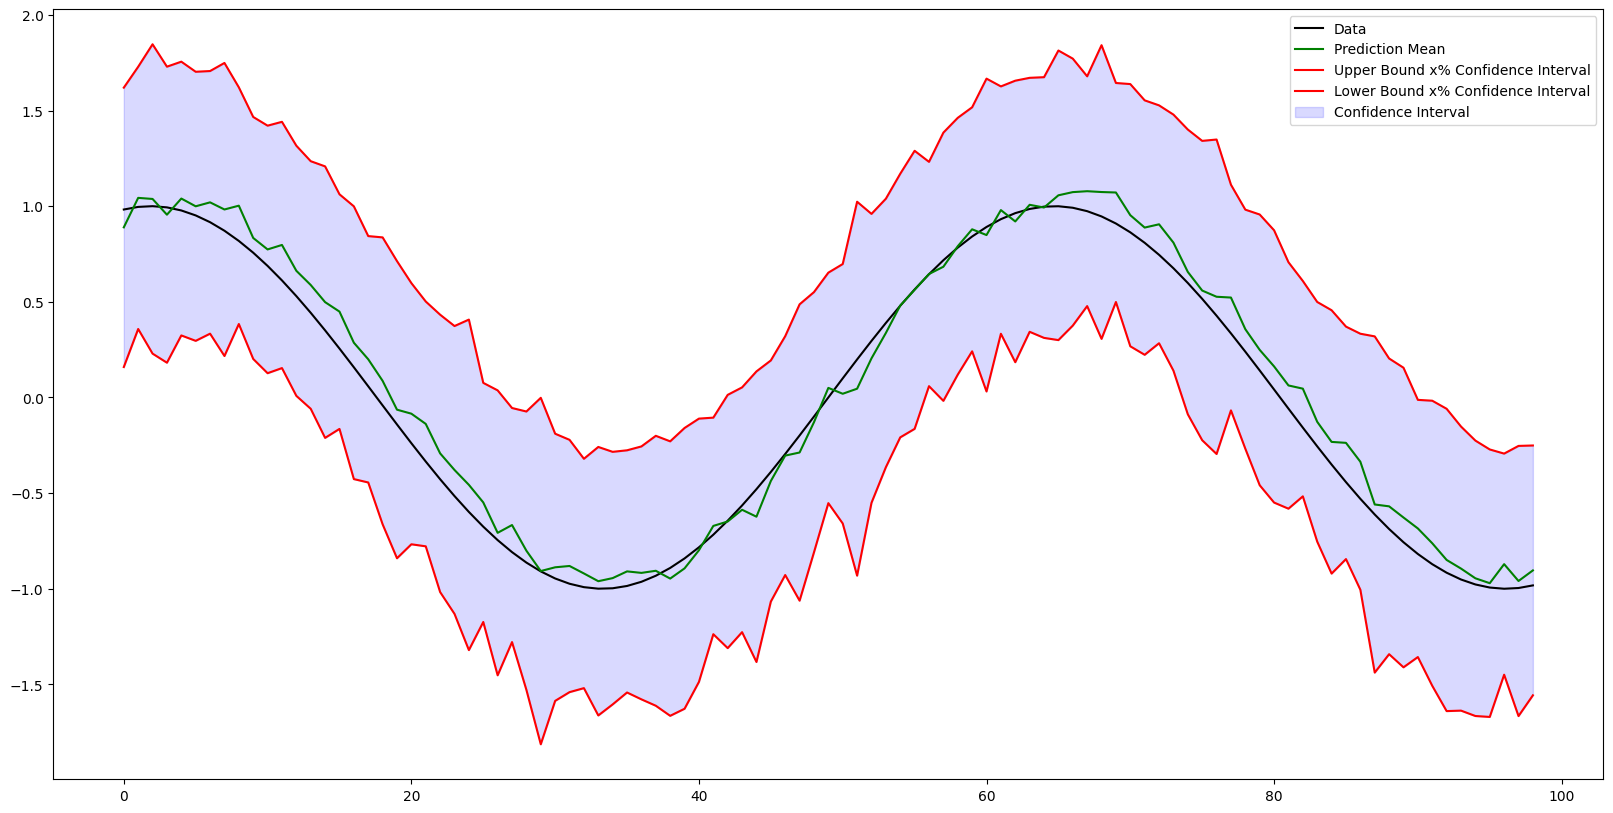

In [9]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

# Model Performance On Multiple Inputs

In [10]:
def generate_windowed_dataset(data, window_size):
    return np.array([y_data[i:i+window_size].reshape(-1, 1) for i in range(len(y_data) - window_size)])

## On Linear Data

In [11]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

window_size = 2
feature_data = generate_windowed_dataset(y_data, window_size)
target_data = y_data.reshape(-1, 1, 1)[window_size:]

n_epochs = 100
learning_rate = 10 ** -4

In [12]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate, window_size)
bnn.generate_m()
bnn.generate_v()
bnn.train(n_epochs)

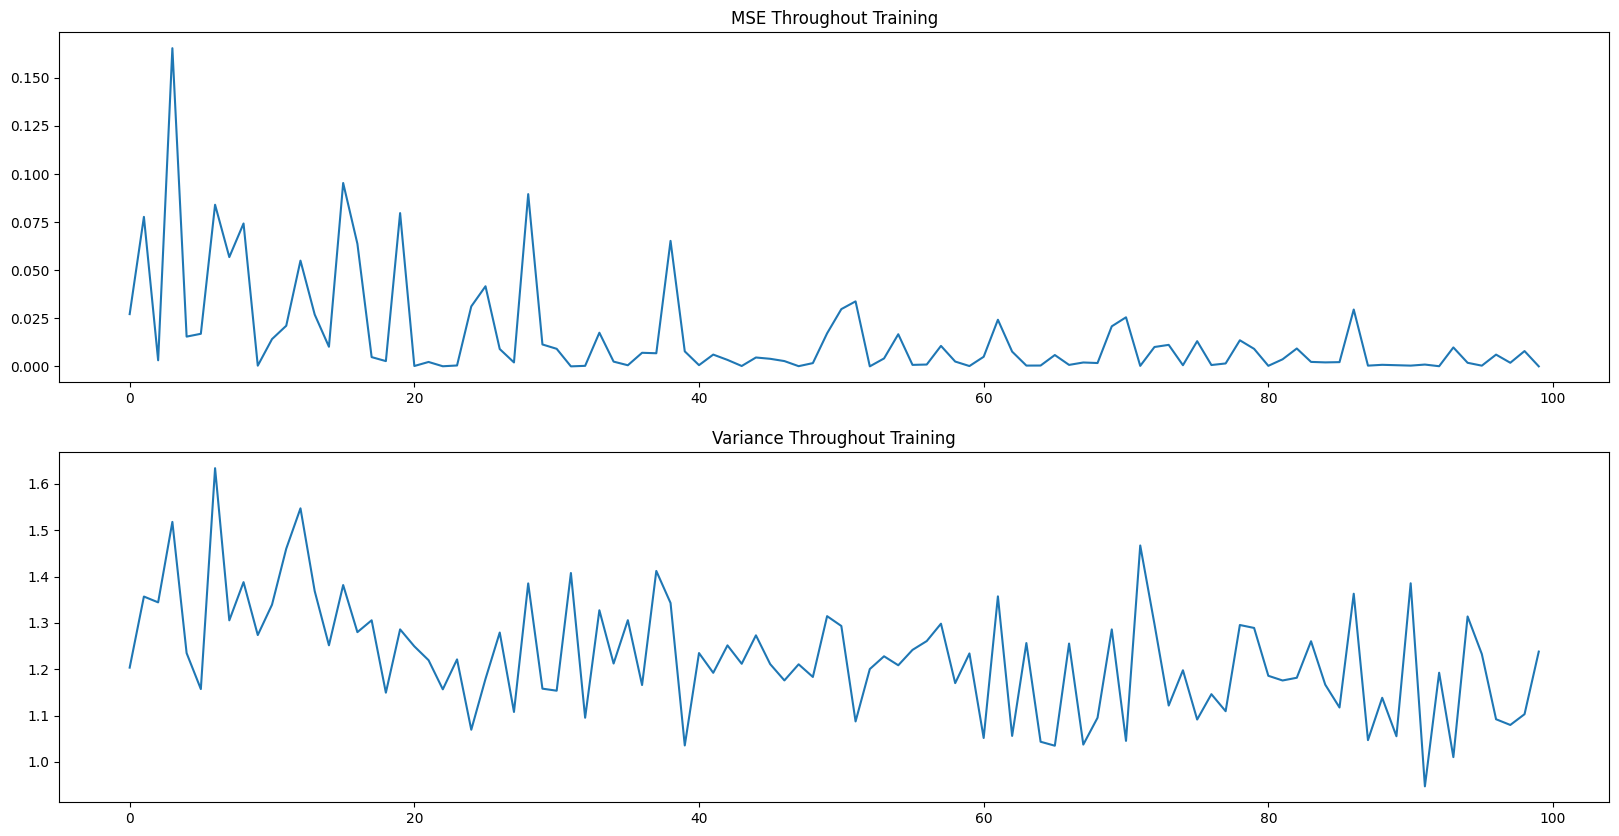

In [13]:
bnn.visualize_performance()

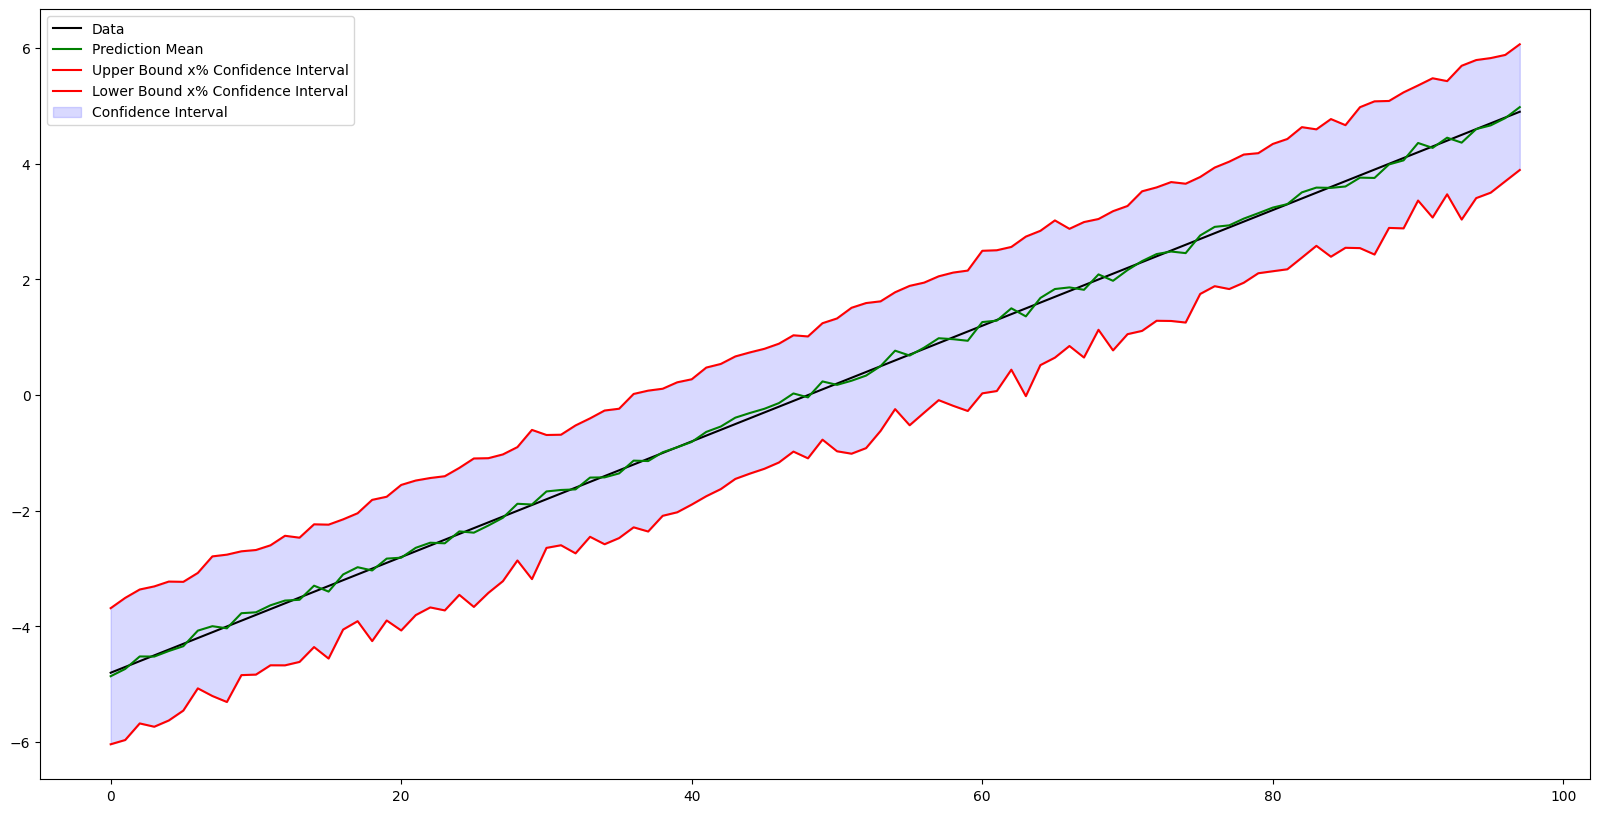

In [14]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

## On Sinusoidal Data

In [26]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data)

window_size = 2
feature_data = generate_windowed_dataset(y_data, window_size)
target_data = y_data.reshape(-1, 1, 1)[window_size:]

n_epochs = 100
learning_rate = 10 ** -11

In [27]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate, window_size)
bnn.generate_m()
bnn.generate_v()

In [28]:
bnn.train(n_epochs)

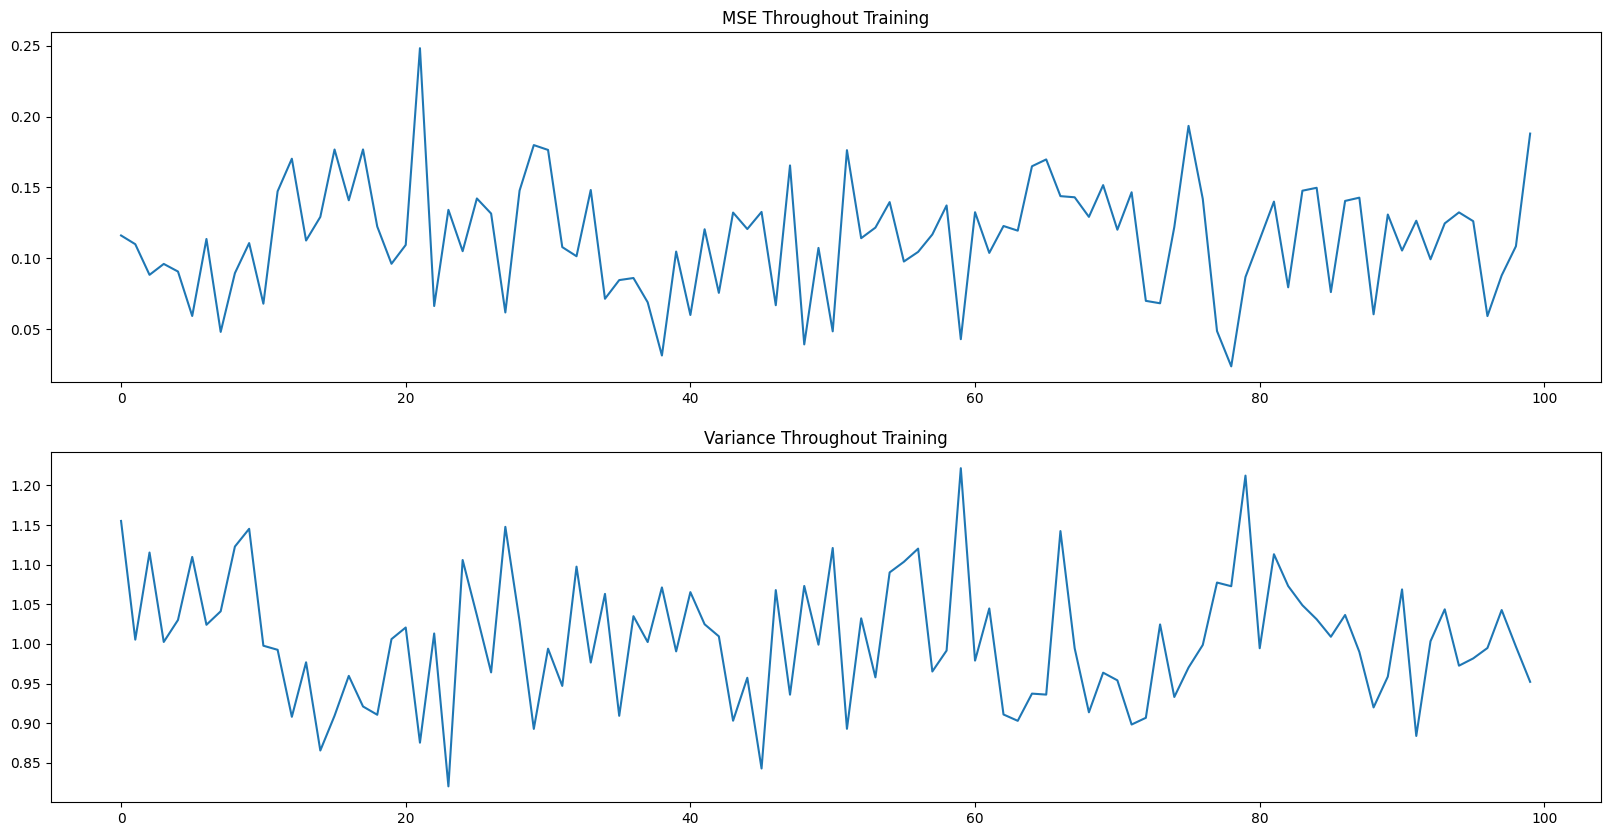

In [29]:
bnn.visualize_performance()

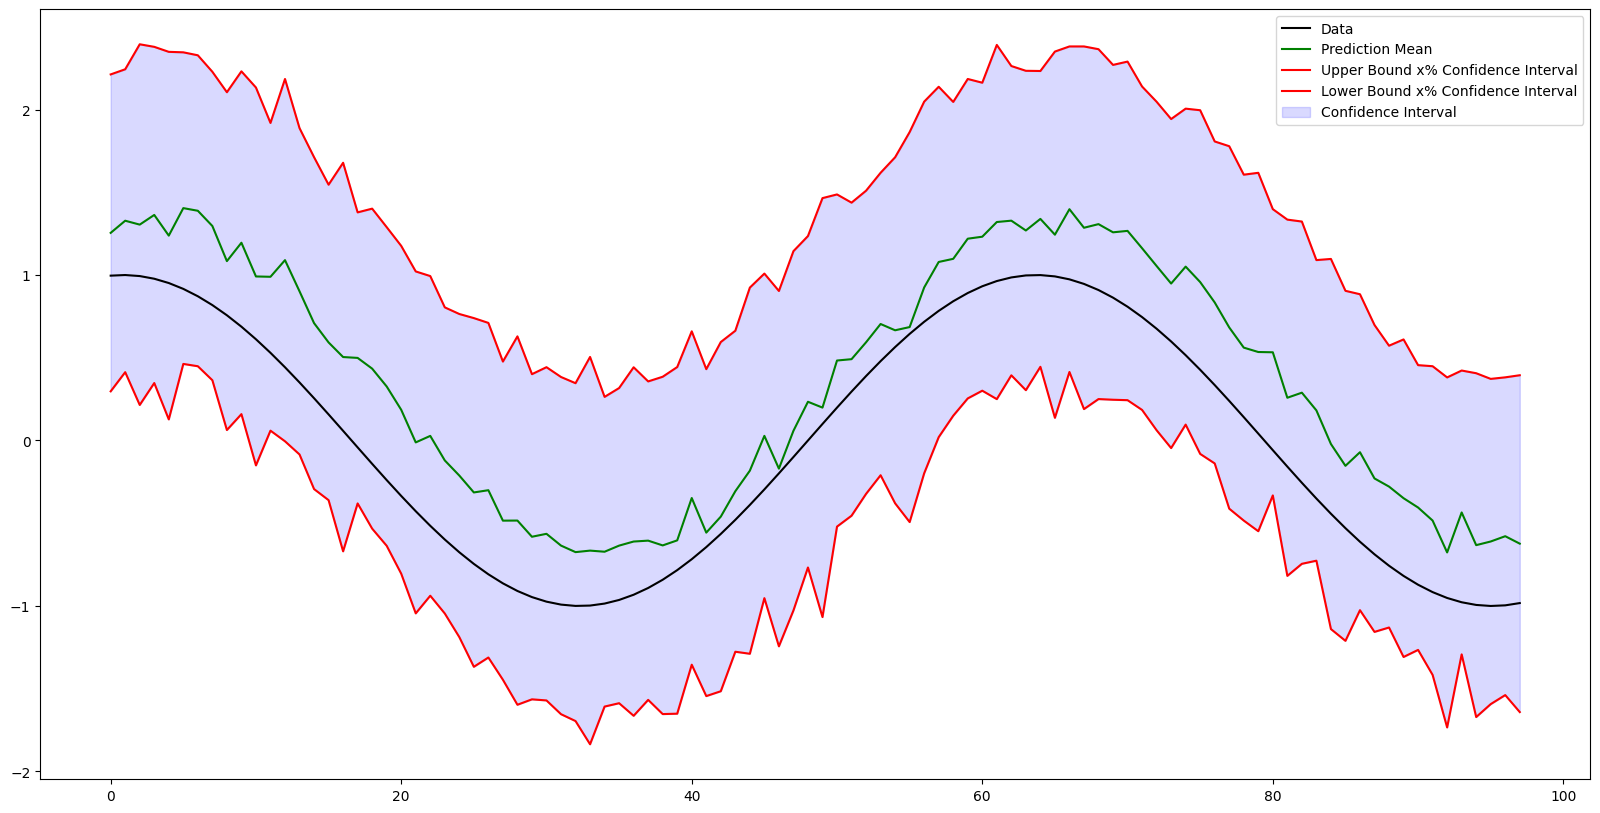

In [30]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

# Model Performance On Data With Outliers

## On Linear Data

In [63]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.arange(-5, 5, 0.1)  * np.random.standard_normal(x_data.shape)

window_size = 3
feature_data = generate_windowed_dataset(y_data, window_size)
target_data = y_data.reshape(-1, 1, 1)[window_size:]

n_epochs = 50
learning_rate = 10 ** -21

In [65]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate, window_size)
bnn.generate_m()
bnn.generate_v()

In [66]:
bnn.train(n_epochs)

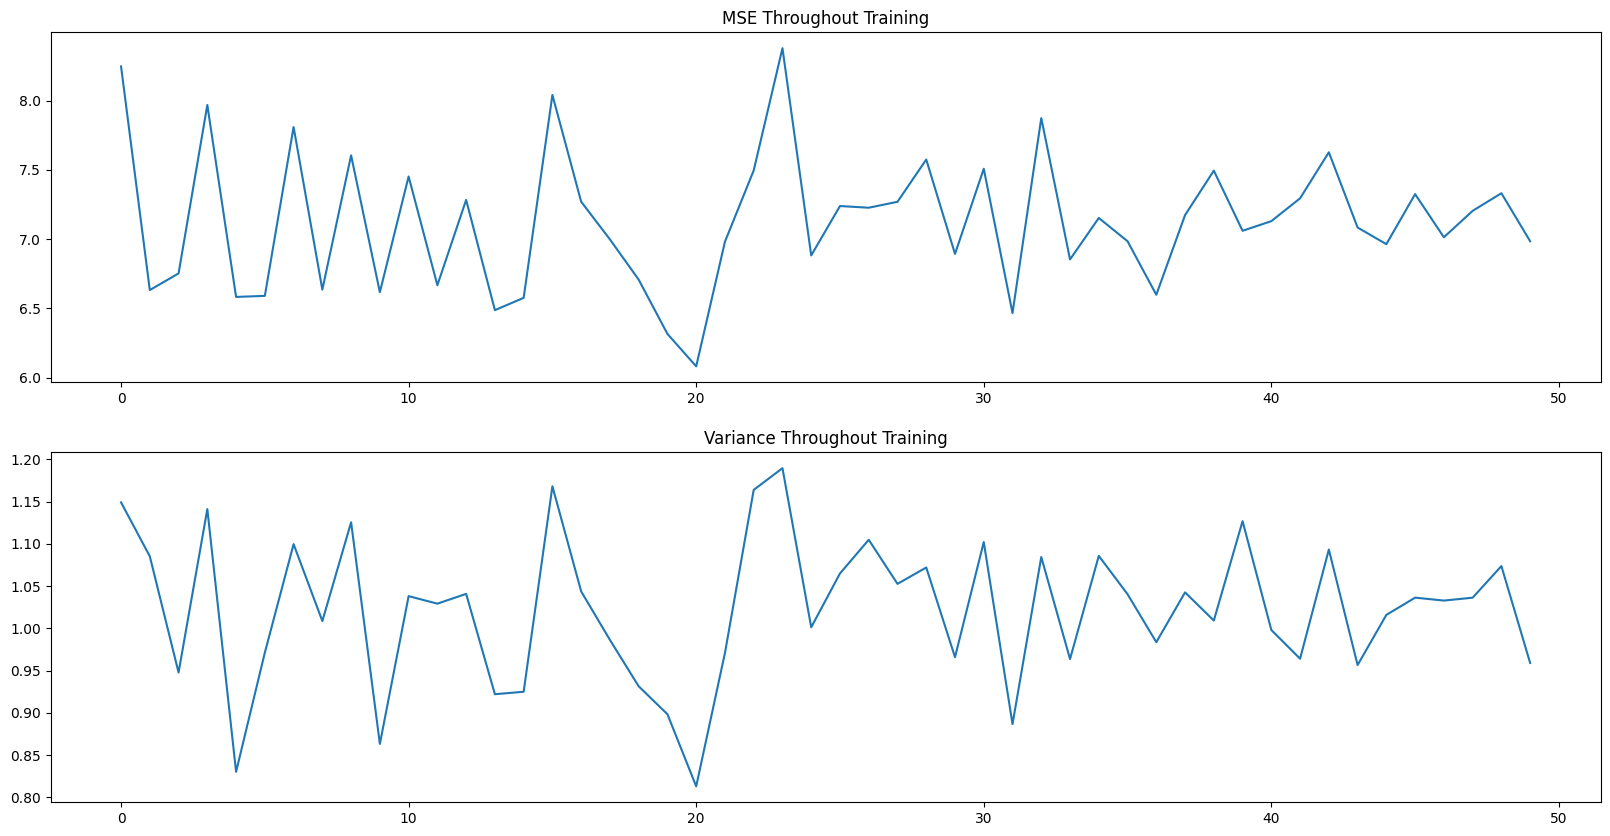

In [67]:
bnn.visualize_performance()

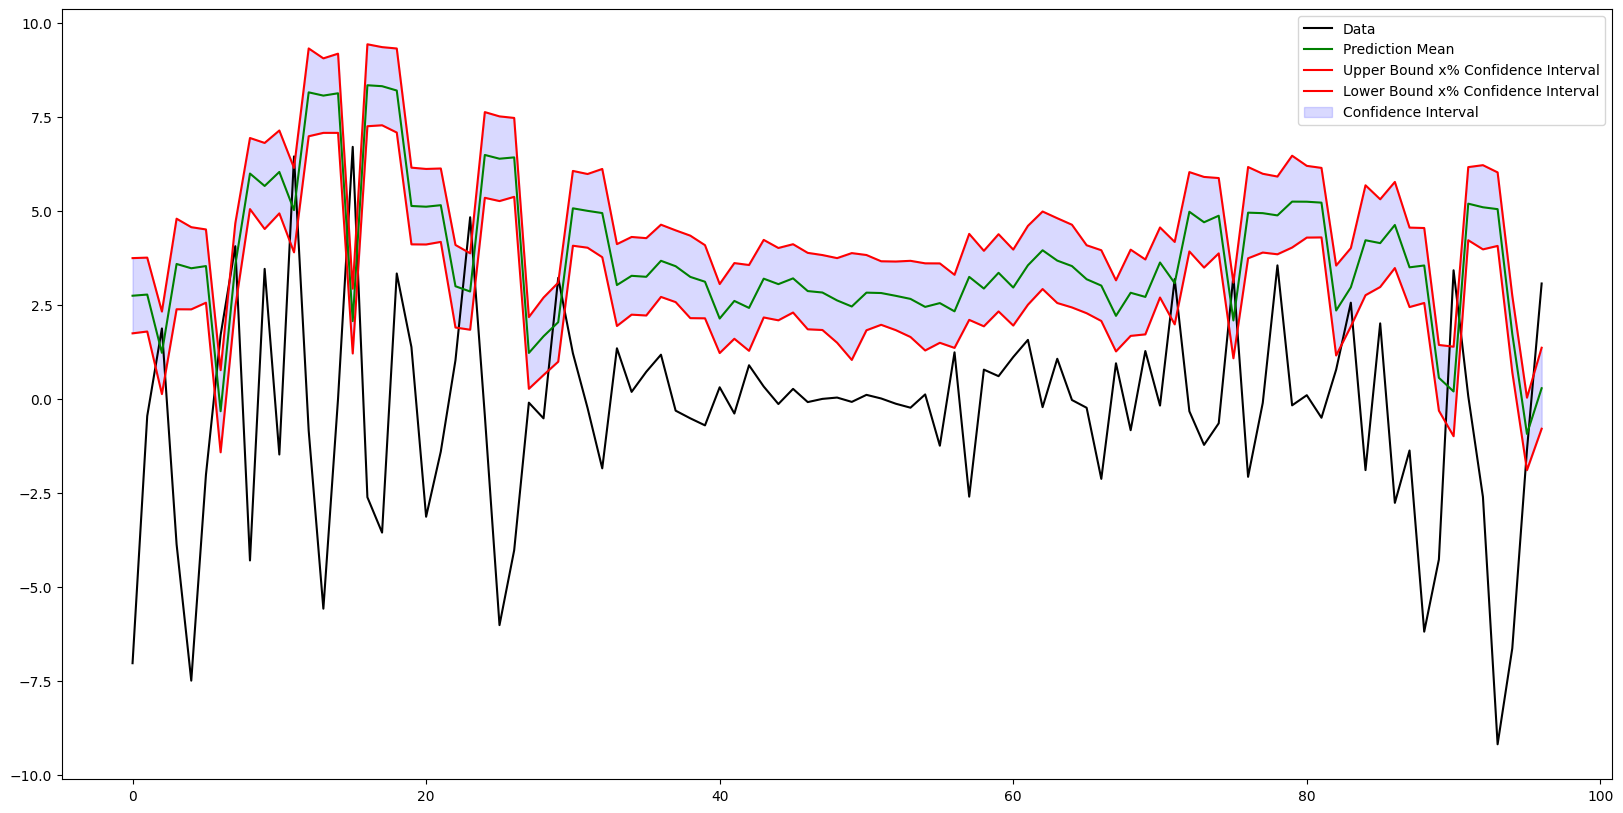

In [68]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

In [44]:
df = pd.DataFrame({'Prediction Mean':bnn.predictions_mean,
                 'Prediction Std':bnn.predictions_std,
                 'Upper Bound':bnn.upper_bound,
                 'Lower Bound':bnn.lower_bound})
df['CI'] = df['Upper Bound'] - df['Lower Bound']

In [47]:
df.sort_values('CI', ascending=True).head(10)

,Prediction Mean,Prediction Std,Upper Bound,Lower Bound,CI
95,5.295019,0.943324,6.238343,4.351695,1.886647
71,2.982850,0.945167,3.928017,2.037683,1.890334
22,-1.968358,0.957113,-1.011245,-2.925472,1.914227
67,2.518014,0.965792,3.483806,1.552222,1.931584
54,1.154744,0.965979,2.120723,0.188765,1.931959
15,-2.703834,0.968100,-1.735734,-3.671934,1.936200
65,2.375184,0.979528,3.354712,1.395656,1.959056
3,-3.849838,0.983404,-2.866434,-4.833242,1.966809
33,-0.882729,0.990646,0.107917,-1.873374,1.981291
40,-0.243011,0.992537,0.749525,-1.235548,1.985073


# On Sinusoidal Data

In [25]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

window_size = 2
feature_data = generate_windowed_dataset(y_data, window_size)
target_data = y_data.reshape(-1, 1, 1)[window_size:]

n_epochs = 100
learning_rate = 10 ** -4